In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Load the dataset

In [2]:
# load dataset
nova_trade = pd.read_csv(r"D:\downloads\NovaTrade_Brasil_Demand.csv",delimiter = ";",index_col = 0)
nova_trade

,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
"Week of the month (first week, second, third, fourth or fifth week",,,,,,,,,,,,
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291


In [3]:
# check null values
nova_trade.isnull().sum()

Day of the week (Monday to Friday)           0
Non-urgent order                             0
Urgent order                                 0
Order type A                                 0
Order type B                                 0
Order type C                                 0
Fiscal sector orders                         0
Orders from the traffic controller sector    0
Banking orders (1)                           0
Banking orders (2)                           0
Banking orders (3)                           0
Target (Total orders)                        0
dtype: int64

In [4]:
# check duplicate value
nova_trade.duplicated().sum()

0

In [5]:
# shape
nova_trade.shape

(60, 12)

In [6]:
# infonova_trade.info()
nova_trade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 5
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Day of the week (Monday to Friday)         60 non-null     int64  
 1   Non-urgent order                           60 non-null     float64
 2   Urgent order                               60 non-null     float64
 3   Order type A                               60 non-null     float64
 4   Order type B                               60 non-null     float64
 5   Order type C                               60 non-null     float64
 6   Fiscal sector orders                       60 non-null     float64
 7   Orders from the traffic controller sector  60 non-null     int64  
 8   Banking orders (1)                         60 non-null     int64  
 9   Banking orders (2)                         60 non-null     int64  
 10  Banking orders (3)                

In [7]:
# describe
nova_trade.describe().T


,count,mean,std,min,25%,50%,75%,max
Day of the week (Monday to Friday),60.0,4.033333,1.401775,2.000,3.00000,4.0000,5.00000,6.000
Non-urgent order,60.0,172.554933,69.505788,43.651,125.34800,151.0625,194.60650,435.304
Urgent order,60.0,118.920850,27.170929,77.371,100.88800,113.1145,132.10825,223.270
Order type A,60.0,52.112217,18.829911,21.826,39.45625,47.1665,58.46375,118.178
Order type B,60.0,109.229850,50.741388,25.125,74.91625,99.4820,132.17100,267.342
Order type C,60.0,139.531250,41.442932,74.372,113.63225,127.9900,160.10750,302.448
Fiscal sector orders,60.0,77.396133,186.502470,0.000,1.24325,7.8315,20.36075,865.000
Orders from the traffic controller sector,60.0,44504.350000,12197.905134,11992.000,34994.25000,44312.0000,52111.75000,71772.000
Banking orders (1),60.0,46640.833333,45220.736293,3452.000,20130.00000,32527.5000,45118.75000,210508.000
Banking orders (2),60.0,79401.483333,40504.420041,16411.000,50680.50000,67181.0000,94787.75000,188411.000


In [8]:
# columns
nova_trade.columns

Index(['Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [9]:
# corr relation
nova_trade.corr()

,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Day of the week (Monday to Friday),1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712
Banking orders (1),-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,0.003523,-0.162309,1.000000,0.262905,0.221335,0.630365
Banking orders (2),-0.577035,0.788192,0.660868,0.294374,0.713674,0.718739,-0.055066,0.240450,0.262905,1.000000,-0.108797,0.798447


EDA (Exploratory Data Analysis)

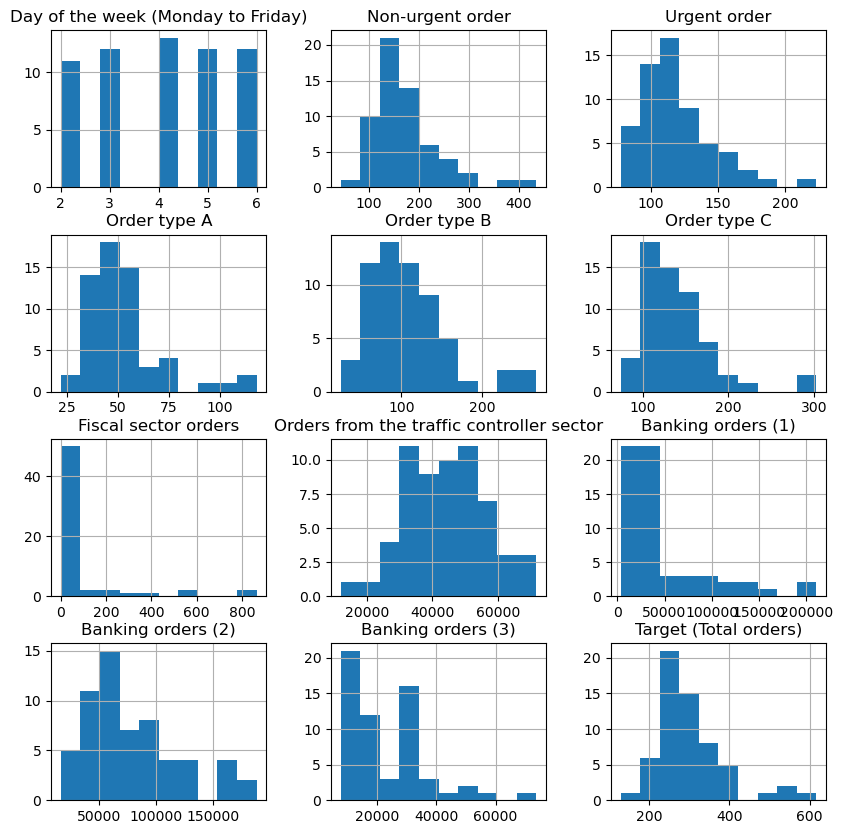

In [10]:
# hist plot
nova_trade.hist(figsize=(10, 10))
plt.show()

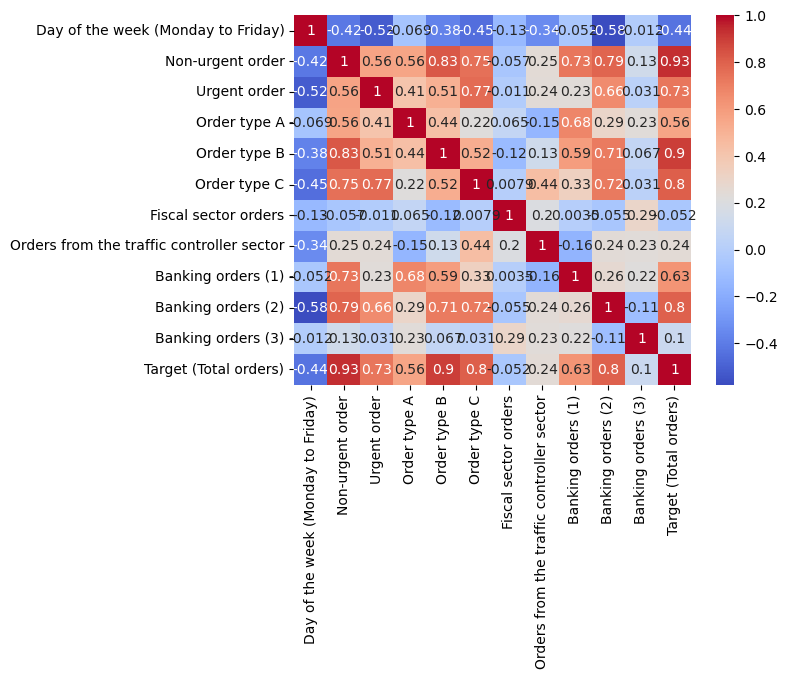

In [11]:
# corr matrix
corr_matrix = nova_trade.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

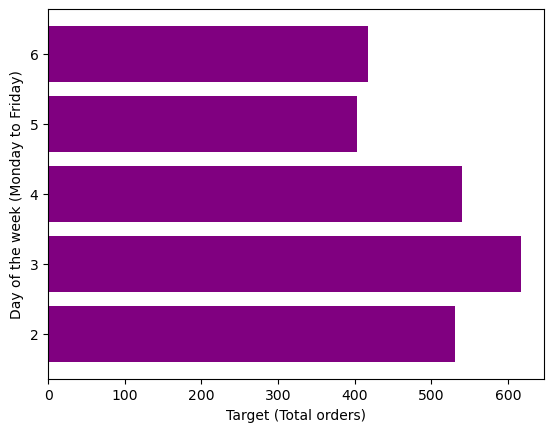

In [12]:
# Assuming nova_trade is your DataFrame containing the data
plt.barh(y = nova_trade["Day of the week (Monday to Friday)"], width = nova_trade["Target (Total orders)"],color = "purple")
plt.xlabel('Target (Total orders)')
plt.ylabel('Day of the week (Monday to Friday)')
plt.show()


# Multiple Regression

select columns x & y 

In [13]:
x= nova_trade.drop(columns =[
    "Day of the week (Monday to Friday)",
    "Fiscal sector orders",
    "Orders from the traffic controller sector",
    "Banking orders (3)",
    "Target (Total orders)"])
y= nova_trade["Target (Total orders)"]

# Linear Regression

In [14]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
print('Linear Regression  R-squared Error:', r2_score(y_test, y_pred))


Linear Regression  R-squared Error: 1.0


# Ridge Regression¶

In [15]:
# Ridge Regression
ridge = Ridge(alpha=0.05)
ridge.fit(x_train, y_train)
y_ridge_pred = ridge.predict(x_test)
print('Ridge Regression  R-squared Error:', r2_score(y_test, y_ridge_pred))


Ridge Regression  R-squared Error: 0.9999999997872492


# Lasso Regression

In [16]:
# Lasso Regression
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)
y_lasso_pred = lasso.predict(x_test)
print('Lasso Regression  R-squared Error:', r2_score(y_test, y_lasso_pred))


Lasso Regression  R-squared Error: 0.9999972689706761


# Random Forest

In [17]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)
y_random_forest_pred = random_forest.predict(x_test)
print('Random Forest  R-squared Error:', r2_score(y_test, y_random_forest_pred))


Random Forest  R-squared Error: 0.7460891954233683


# Decision Tree Regressor

In [18]:
# decision Tree
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(x_train, y_train)
y_decision_tree_pred = decision_tree_reg.predict(x_test)
print('Decision Tree Regressor R-squared Error:', r2_score(y_test, y_decision_tree_pred))

Decision Tree Regressor R-squared Error: 0.4268197933877953


# XGBoost

In [19]:
# XGBoost Regressor
xg_boost =xgb.XGBRegressor(objective = "reg:squarederror",random_state = 42)
xg_boost.fit(x_train,y_train)
y_xgb_pred =xg_boost.predict(x_test)
print("XGBoost Regressor squared Error:", r2_score(y_test,y_xgb_pred))

XGBoost Regressor squared Error: 0.7942518033168241


Model Evaluation

In [20]:
#apply model evaluation technique on xg_boost
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


## Set up parameter grid
parameter_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_boost=xgb.XGBRegressor(random_state=42)
#perform grid search cv
grid_search=GridSearchCV(estimator=xgb_boost,param_grid=parameter_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(x_train,y_train)
best_param=grid_search.best_params_
print(f'Best parameter : {best_param}')

best_model=grid_search.best_estimator_
best_pred=best_model.predict(x_test)
best_accuracy=r2_score(y_test,best_pred)
print(f'best accuracy after grid search is:{best_accuracy}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameter : {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
best accuracy after grid search is:0.7886747273476069
